In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.name = df.name.str.lower().str.replace(' ', '_')

In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.price.unique().max()

10000

### EDA

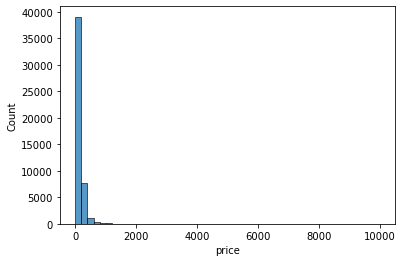

In [9]:
sns.histplot(df.price, bins=50);

<AxesSubplot:xlabel='price', ylabel='Count'>

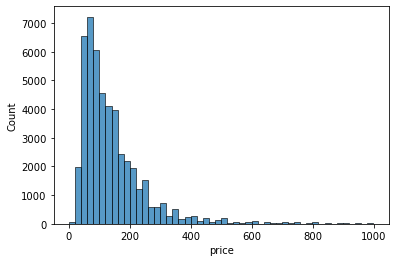

In [10]:
sns.histplot(df.price[df.price < 1000], bins=50)

In [11]:
price_logs = np.log1p(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

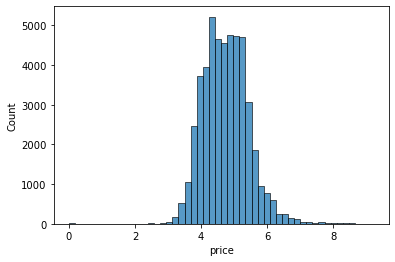

In [12]:
sns.histplot(price_logs, bins=50)

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
df_col = df[['latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [15]:
df_col.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,NaN,1,365
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0


#### Question 1

Find a feature with missing values. How many missing values does it have?

In [16]:
df_col.shape

(48895, 9)

In [17]:
df_col.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [18]:
median = df['minimum_nights'].median()
median

3.0

In [19]:
n = len(df_col)
n

48895

In [20]:
n_train = int(n*0.6)
n_val = int(n * 0.2)
n_test =  n - n_train - n_val

In [21]:
n_train , n_val, n_test

(29337, 9779, 9779)

In [22]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [23]:
idx = np.arange(n)

In [24]:
np.random.seed(42)
np.random.shuffle(idx)

In [25]:
df_train = df_col.iloc[idx[:n_train]]
df_val = df_col.iloc[idx[n_train:n_train+n_val]]
df_test = df_col.iloc[idx[n_train+n_val:]]

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [28]:
del df_train['price']
del df_val['price']
del df_test['price']

In [29]:
len(y_train)

29337

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [31]:
df_train.dtypes , df_train.columns

(latitude                          float64
 longitude                         float64
 minimum_nights                      int64
 number_of_reviews                   int64
 last_review                        object
 reviews_per_month                 float64
 calculated_host_listings_count      int64
 availability_365                    int64
 dtype: object,
 Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
        'last_review', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'],
       dtype='object'))

In [32]:
base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365']
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [33]:
w0, w

(-419.91265866086724,
 array([ 1.30676226e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470066e-03,  1.33371320e-03,  6.50203890e-04]))

<AxesSubplot:ylabel='Count'>

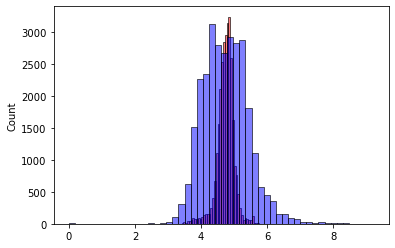

In [34]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [35]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [36]:
rmse(y_train, y_pred)

0.6428860484860401

In [37]:
X_train = df_train[base].fillna(df_train[base].mean()).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [38]:
rmse(y_train, y_pred)

0.6429347474014216

In [39]:
base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365']
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [40]:
base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365']
X_val = df_val[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_val.dot(w)

In [41]:
rmse(y_val, y_pred)

0.6430337788467193

In [61]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [76]:

w0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)


y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6430341157446238

In [78]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)


    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 -419.91265866086724 0.6430337788467193
1e-06 -419.86271584310543 0.6430341157446238
0.0001 -414.9764926433289 0.6430723153546262
0.001 -375.27365274892543 0.6437669735278212
0.01 -191.7838405478213 0.6557528427418694
0.1 -32.562560550033176 0.67732996424535
1 -3.499216833574792 0.682311695016146
5 -0.7033623186161135 0.6827915727847539
10 -0.35127676047352 0.6828430212100526


In [81]:
X_train = df_train[base].fillna(0).values
X_val = df_val[base].fillna(0).values
X_test = df_test[base].fillna(0).values

In [82]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [83]:

w0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)


y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6430341157446238

In [89]:
l = list()

0 -416.69175530387963 0.6537577204662
1e-06 -416.642025549956 0.6537582578126445
0.0001 -411.77687092602 0.6538161139476608
0.001 -372.2595969817486 0.6546737347714352
0.01 -189.9592830083035 0.6674431219660845
0.1 -32.21101818290949 0.689649748898877
1 -3.4606257079820315 0.6947330794963332
5 -0.6955923274307221 0.695219070080218
10 -0.34739634146249765 0.6952670519959349
0 -420.8725859211554 0.6576662279079951
1e-06 -420.82193094495256 0.6576659541412739
0.0001 -415.8667422029877 0.6576446720198714
0.001 -375.6545288737947 0.6578743910560299
0.01 -190.98289999910315 0.6680498301454804
0.1 -32.28128114753099 0.6883076745678586
1 -3.46612967626927 0.6930580743653032
5 -0.696634249626279 0.6935293388486973
10 -0.34789984052250245 0.6935930438822152
0 -420.1767350185024 0.6405440394705177
1e-06 -420.1270202503096 0.6405442726102151
0.0001 -415.2628035171556 0.6405722564083025
0.001 -375.71697844884034 0.6411795514053084
0.01 -192.44714939651226 0.6527179514119764
0.1 -32.73979416144262 0

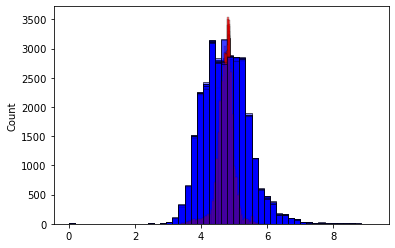

In [91]:
for i in range(10):
    np.random.seed(i)
    np.random.shuffle(idx)

    df_train = df_col.iloc[idx[:n_train]]
    df_val = df_col.iloc[idx[n_train:n_train+n_val]]
    df_test = df_col.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']

    len(y_train)

    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)

        return w_full[0], w_full[1:]

    df_train.dtypes , df_train.columns

    base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
            'availability_365']
    X_train = df_train[base].fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)

    w0, w

    sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
    sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

    def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)

    rmse(y_train, y_pred)

    X_train = df_train[base].fillna(df_train[base].mean()).values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)

    rmse(y_train, y_pred)

    base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
            'availability_365']
    X_train = df_train[base].fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)

    base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
            'availability_365']
    X_val = df_val[base].fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)

    rmse(y_val, y_pred)

    def train_linear_regression_reg(X, y, r=0.001):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX = XTX + r * np.eye(XTX.shape[0])

        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)

        return w_full[0], w_full[1:]


    w0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)


    y_pred = w0 + X_val.dot(w)
    rmse(y_val, y_pred)

    for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
        w0, w = train_linear_regression_reg(X_train, y_train, r=r)


        y_pred = w0 + X_val.dot(w)
        score = rmse(y_val, y_pred)

        print(r, w0, score)

    X_train = df_train[base].fillna(0).values
    X_val = df_val[base].fillna(0).values
    X_test = df_test[base].fillna(0).values

    def train_linear_regression_reg(X, y, r=0.001):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX = XTX + r * np.eye(XTX.shape[0])

        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)

        return w_full[0], w_full[1:]


    w0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)


    y_pred = w0 + X_val.dot(w)
  
    l.append(rmse(y_val, y_pred))

In [95]:
pd.DataFrame(l).std()

0    0.007267
dtype: float64

In [96]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_col.iloc[idx[:n_train]]
df_val = df_col.iloc[idx[n_train:n_train+n_val]]
df_test = df_col.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']



def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

df_train.dtypes , df_train.columns

base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365']
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)


def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)



X_train = df_train[base].fillna(df_train[base].mean()).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

rmse(y_train, y_pred)

base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365']
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365']

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


w0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)


y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)


    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

X_train = df_train[base].fillna(0).values
X_val = df_val[base].fillna(0).values
X_test = df_test[base].fillna(0).values

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


w0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)


y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0 -420.99399513962754 0.7429910840857712
1e-06 -420.94415201865445 0.742982786137758
0.0001 -416.0674367304546 0.7421750105532282
0.001 -376.42264337621896 0.7359129490157356
0.01 -192.7556104294954 0.7143041195975399
0.1 -32.78450187067928 0.7059776798974965
1 -3.524271275836078 0.7055263572816417
5 -0.7084936116060917 0.705407809695473
10 -0.35388285634495553 0.7053025369681484


0.6455115474099807

In [97]:
df_full_train = pd.concat([df_train, df_val])

In [98]:
df_full_train = df_full_train.reset_index(drop=True)

In [103]:
X_full_train = df_full_train[base].fillna(0).values

In [104]:
y_full_train = np.concatenate([y_train, y_val])

In [105]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [106]:
X_test = df_test[base].fillna(0).values
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.638205913000831